 # <center> Assignment-2 :HETREC_Movie_Data_Analysis</center>
## Introduction :
The purpose of this Assignment is to: 
- practice data processing
- visualization, 
- and inference.
- Using T-tests, confidence interval and Bootstrap procedure


## Data
<p>The data for this analysis was got from <a href="https://files.grouplens.org/datasets/hetrec2011/hetrec2011-movielens-2k-v2.zip">MovieLens Data</a> The most recent cohort's data was used in this study, and the <a href= "https://files.grouplens.org/datasets/hetrec2011/hetrec2011-movielens-readme.txt">technical documentation</a> was used alongside the data for proper understanding of the data.</p>


## Setup


In [1]:
#Importing the various needed Python Libraries.
import pandas as pd
import scipy as sci
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

## Load Data 

In [2]:
movies = pd.read_table('movies.dat', sep='\t', na_values=['\\N'], encoding='latin1')
movies = movies.set_index("id")
movies



,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
id,,,,,,,,,,,,,,,,,,,,
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,100.0,8.5,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...
2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,15.0,46.0,5.8,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...
3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,12.0,66.0,7.0,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...
4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,11.0,56.0,5.5,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...
5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,10.0,47.0,5.4,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65088,Bedtime Stories,960731,Más allá de los sueños,http://ia.media-imdb.com/images/M/MV5BMjA5Njk5...,2008,bedtime_stories,4.4,104.0,26.0,78.0,25.0,4.7,26.0,6.0,20.0,23.0,3.5,108877.0,63.0,http://content6.flixster.com/movie/10/94/33/10...
65091,Manhattan Melodrama,25464,El enemigo público número 1,http://ia.media-imdb.com/images/M/MV5BMTUyODE3...,1934,manhattan_melodrama,7.0,12.0,10.0,2.0,83.0,0.0,4.0,2.0,2.0,50.0,3.7,344.0,71.0,http://content9.flixster.com/movie/66/44/64/66...
65126,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135.0,73.0,62.0,54.0,4.9,26.0,8.0,18.0,30.0,3.3,13893.0,55.0,http://content6.flixster.com/movie/10/85/09/10...


In [3]:
#Set up the random number generator for the bootstrap procedures
rng = np.random.default_rng(20200913)

- Using .info() method to see the various internal details of the data set like the data types,memory usage,
- number of entries, and columns etc

In [4]:
movies.info()# See details about the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10197 entries, 1 to 65133
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   10197 non-null  object 
 1   imdbID                  10197 non-null  int64  
 2   spanishTitle            10197 non-null  object 
 3   imdbPictureURL          10016 non-null  object 
 4   year                    10197 non-null  int64  
 5   rtID                    9886 non-null   object 
 6   rtAllCriticsRating      9967 non-null   float64
 7   rtAllCriticsNumReviews  9967 non-null   float64
 8   rtAllCriticsNumFresh    9967 non-null   float64
 9   rtAllCriticsNumRotten   9967 non-null   float64
 10  rtAllCriticsScore       9967 non-null   float64
 11  rtTopCriticsRating      9967 non-null   float64
 12  rtTopCriticsNumReviews  9967 non-null   float64
 13  rtTopCriticsNumFresh    9967 non-null   float64
 14  rtTopCriticsNumRotten   9967 non-null 

In [5]:
#Describing the Allcritics rating variable numerically and replacinf the zeroes with nan values
movies.loc[movies['rtAllCriticsRating'] == 0, 'rtAllCriticsRating'] = np.nan
movies['rtAllCriticsRating'].describe()

count    8441.000000
mean        6.068404
std         1.526898
min         1.200000
25%         5.000000
50%         6.200000
75%         7.200000
max         9.600000
Name: rtAllCriticsRating, dtype: float64

In [6]:
#Describing the Top critics rating variable numerically and replacinf the zeroes with nan values
movies.loc[movies['rtTopCriticsRating'] == 0, 'rtTopCriticsRating'] = np.nan
movies['rtTopCriticsRating'].describe()

count    4662.000000
mean        5.930330
std         1.534093
min         1.600000
25%         4.800000
50%         6.100000
75%         7.100000
max        10.000000
Name: rtTopCriticsRating, dtype: float64

In [7]:
#Describing the rtAudience rating variable numerically and replacinf the zeroes with nan values
movies.loc[movies['rtAudienceRating'] == 0, 'rtAudienceRating'] = np.nan
movies['rtAudienceRating'].describe()

count    7345.000000
mean        3.389258
std         0.454034
min         1.500000
25%         3.100000
50%         3.400000
75%         3.700000
max         5.000000
Name: rtAudienceRating, dtype: float64

- <b><em>The size of the columns and rows:</em></b>

In [8]:
#Size of the columns of the dataset
size = movies.shape
size

(10197, 20)

- That's 10197 rows and 20 columns


## Comparing Ratings

In [9]:
# Load the user-rated movies data set.
rate_movies=pd.read_table('user_ratedmovies.dat', sep='\t', na_values=['\\N'], encoding='latin1')
rate_movies


,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,3,1.0,29,10,2006,23,17,16
1,75,32,4.5,29,10,2006,23,23,44
2,75,110,4.0,29,10,2006,23,30,8
3,75,160,2.0,29,10,2006,23,16,52
4,75,163,4.0,29,10,2006,23,29,30
...,...,...,...,...,...,...,...,...,...
855593,71534,44555,4.0,3,12,2007,3,5,38
855594,71534,46578,4.0,3,12,2007,2,56,44
855595,71534,48516,4.5,3,12,2007,2,53,46
855596,71534,61075,5.0,10,10,2008,9,56,5


In [10]:
#Computing the mean and count of the rating in user-rated movies and changing the variable names to something more 
#meaningful
rate_nl=rate_movies.groupby('movieID')['rating'].agg(['mean','count']).rename(columns=
{'mean':'mean_rating','count':'rating_count'})
rate_nl

,mean_rating,rating_count
movieID,,
1,3.735154,1263
2,2.976471,765
3,2.873016,252
4,2.577778,45
5,2.753333,225
...,...,...
65088,3.500000,1
65091,4.000000,1
65126,3.250000,2


In [11]:
#Describing the mean_rating numerically
rate_nl.describe()

,mean_rating,rating_count
count,10109.000000,10109.000000
mean,3.213406,84.637254
std,0.640538,172.115584
min,0.500000,1.000000
25%,2.851293,6.000000
50%,3.312415,21.000000
75%,3.681452,75.000000
max,5.000000,1670.000000


- <b>Combining the movie data set with the user_rated data set :</b>

In [12]:
#merging the movies with the user-rated movies data set to answer questions
movie_and_ratings= movies.merge(rate_nl,right_on='movieID', left_index=True)
movie_and_ratings

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,...,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,mean_rating,rating_count
movieID,,,,,,,,,,,,,,,,,,,,,
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,...,17.0,17.0,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...,3.735154,1263
2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28.0,13.0,15.0,...,5.0,2.0,3.0,40.0,3.2,44587.0,61.0,http://content8.flixster.com/movie/56/79/73/56...,2.976471,765
3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36.0,24.0,12.0,...,6.0,5.0,1.0,83.0,3.2,10489.0,66.0,http://content6.flixster.com/movie/25/60/25602...,2.873016,252
4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25.0,14.0,11.0,...,11.0,5.0,6.0,45.0,3.3,5666.0,79.0,http://content9.flixster.com/movie/10/94/17/10...,2.577778,45
5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19.0,9.0,10.0,...,5.0,1.0,4.0,20.0,3.0,13761.0,64.0,http://content8.flixster.com/movie/25/54/25542...,2.753333,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65088,Bedtime Stories,960731,Más allá de los sueños,http://ia.media-imdb.com/images/M/MV5BMjA5Njk5...,2008,bedtime_stories,4.4,104.0,26.0,78.0,...,26.0,6.0,20.0,23.0,3.5,108877.0,63.0,http://content6.flixster.com/movie/10/94/33/10...,3.500000,1
65091,Manhattan Melodrama,25464,El enemigo público número 1,http://ia.media-imdb.com/images/M/MV5BMTUyODE3...,1934,manhattan_melodrama,7.0,12.0,10.0,2.0,...,4.0,2.0,2.0,50.0,3.7,344.0,71.0,http://content9.flixster.com/movie/66/44/64/66...,4.000000,1
65126,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135.0,73.0,62.0,...,26.0,8.0,18.0,30.0,3.3,13893.0,55.0,http://content6.flixster.com/movie/10/85/09/10...,3.250000,2


- <b>Describing AllCriticRating numerically:</b>

In [13]:
movies['rtAllCriticsRating'].describe()

count    8441.000000
mean        6.068404
std         1.526898
min         1.200000
25%         5.000000
50%         6.200000
75%         7.200000
max         9.600000
Name: rtAllCriticsRating, dtype: float64

- <b>Describing AllCrtiticsRatings graphically:</b>

Text(0.5, 1.0, 'AllCriticsRatings:Graphically described')

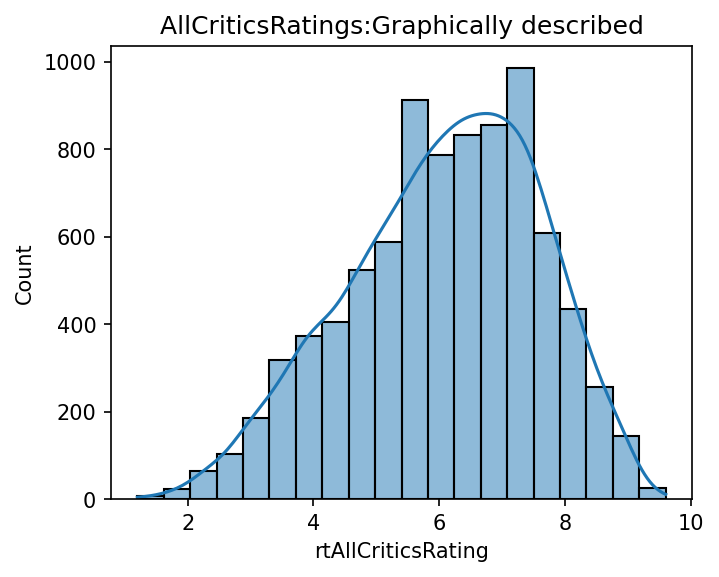

In [14]:
fig = plt.figure(figsize=(5, 4), dpi=150)
sns.histplot(movies['rtAllCriticsRating'],bins=20,kde=True)
plt.title('AllCriticsRatings:Graphically described')

-<b> This chart looks slightly left skewed</b>

..

- <b>Describing TopCriticsRating numerically</b> 

In [15]:
movie_and_ratings['rtTopCriticsRating'].describe()

count    4645.000000
mean        5.930850
std         1.534895
min         1.600000
25%         4.800000
50%         6.100000
75%         7.100000
max        10.000000
Name: rtTopCriticsRating, dtype: float64

- <b>Describing TopCriticsRating graphically</b> 

Text(0.5, 1.0, 'TopCriticsRating described graphically')

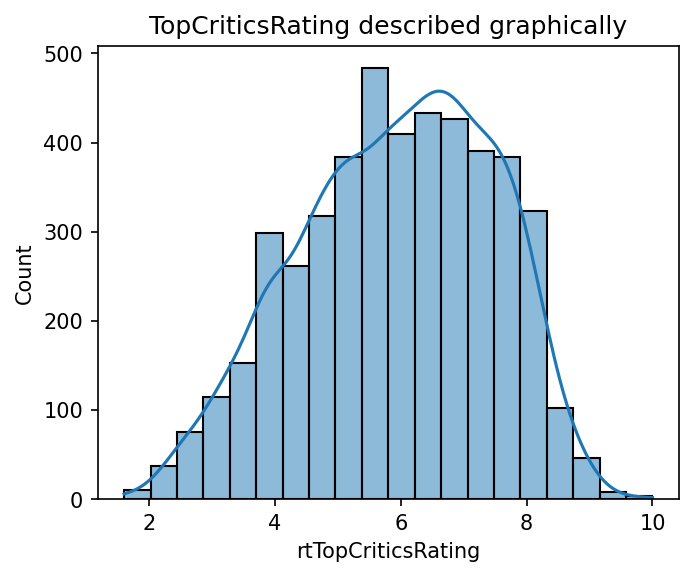

In [16]:
fig = plt.figure(figsize=(5, 4), dpi=150)
sns.histplot(movies['rtTopCriticsRating'],bins=20,kde=True)
plt.title('TopCriticsRating described graphically')

-<b>The graph looks slightly left skewed</b>

<b>Describing rtAudienceRating numerically</b> 

In [17]:
movies['rtAudienceRating'].describe()

count    7345.000000
mean        3.389258
std         0.454034
min         1.500000
25%         3.100000
50%         3.400000
75%         3.700000
max         5.000000
Name: rtAudienceRating, dtype: float64

Text(0.5, 1.0, 'Audience_Rating: VIsually described')

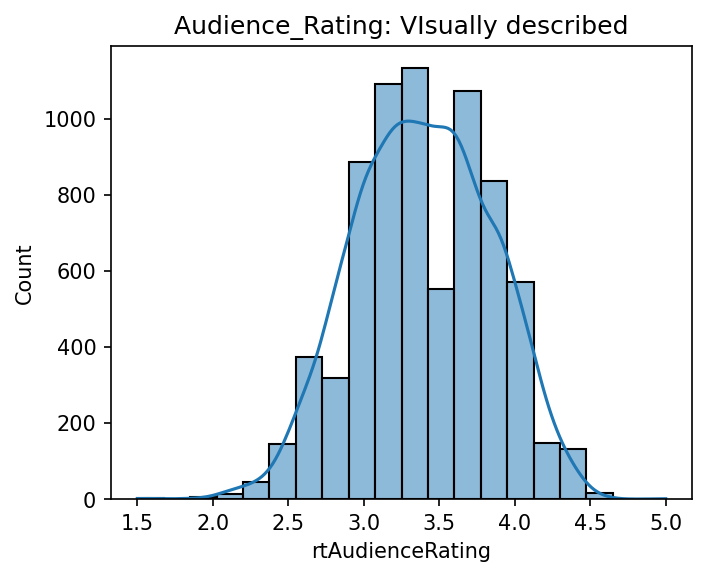

In [18]:
fig = plt.figure(figsize=(5, 4), dpi=150)
sns.histplot(movies['rtAudienceRating'],bins=20,kde=True)
plt.title('Audience_Rating: VIsually described')

- <b>this chart looks normally distributed,though not with enough evidence</b>

Text(0.5, 1.0, "MovieLens user's Mean_Ratings:")

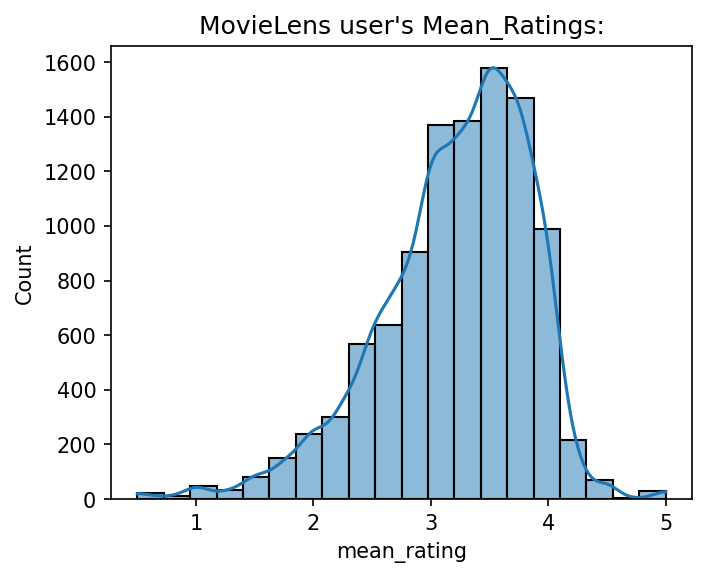

In [19]:
fig = plt.figure(figsize=(5, 4), dpi=150)
sns.histplot(movie_and_ratings['mean_rating'],bins=20,kde=True)
plt.title("MovieLens user's Mean_Ratings:")

- <b> this chart is left skewed</b>

- <b> Describing the rating variables together</b>

In [20]:
#Bringing the four variables tyogether
rating_variables=movie_and_ratings[['rtAllCriticsRating','rtTopCriticsRating','rtAudienceRating','mean_rating']]
rating_variables

,rtAllCriticsRating,rtTopCriticsRating,rtAudienceRating,mean_rating
movieID,,,,
1,9.0,8.5,3.7,3.735154
2,5.6,5.8,3.2,2.976471
3,5.9,7.0,3.2,2.873016
4,5.6,5.5,3.3,2.577778
5,5.3,5.4,3.0,2.753333
...,...,...,...,...
65088,4.4,4.7,3.5,3.500000
65091,7.0,NaN,3.7,4.000000
65126,5.6,4.9,3.3,3.250000


Text(0.5, 1.0, 'visualizing the four variables together')

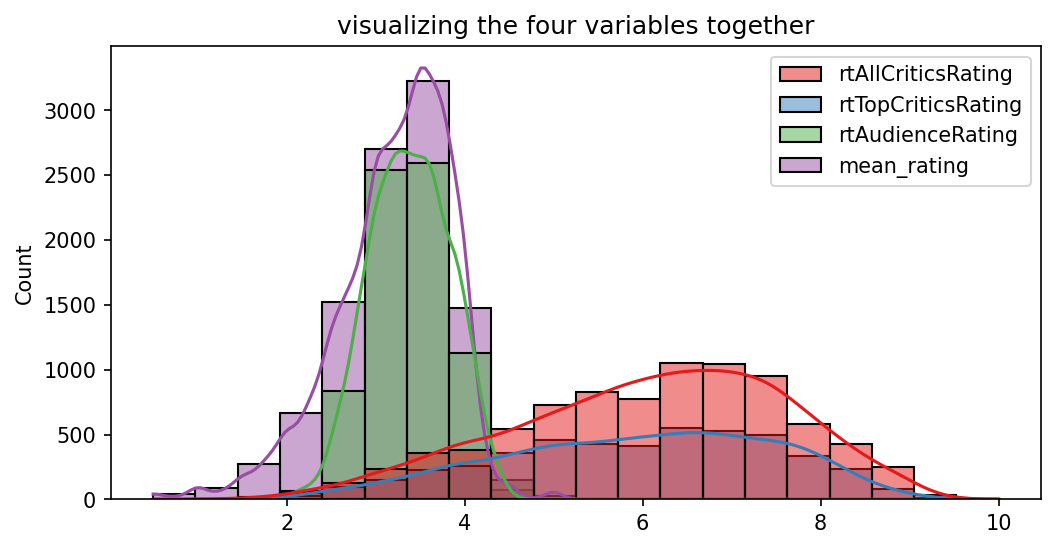

In [21]:
fig = plt.figure(figsize=(8, 4), dpi=150)
sns.histplot(data=rating_variables,kde=True, bins=20, palette="Set1")
plt.title('visualizing the four variables together')

- <b><em>shows that mean rating and audience rating have similar distribution and AllcriticsRating and TopCriticsRating have similar distribution'<em></b>

- <b>Describing the distribution of the difference between the All Critics and Top Critics ratings:</b>

In [22]:
#Computing the difference in the AllCriticsRating and TopCriticsRatings
movies=movies[['rtAllCriticsRating','rtTopCriticsRating']].dropna() #dropping the NaN values
dist_diff= movies['rtAllCriticsRating'] - movies['rtTopCriticsRating']# Taking the the difference
dist_diff

id
1        0.5
2       -0.2
3       -1.1
4        0.1
5       -0.1
        ... 
64997    0.3
65037    0.2
65088   -0.3
65126    0.7
65130   -0.2
Length: 4662, dtype: float64

In [23]:
#Describing the distribution of the difference numerically
dist_desc=dist_diff.describe()
dist_desc

count    4662.000000
mean        0.094123
std         0.549673
min        -2.200000
25%        -0.200000
50%         0.100000
75%         0.400000
max         3.200000
dtype: float64

Text(0.5, 1.0, 'Visually describing the difference distribution b/w AllCriticsRating and TopCriticsRating')

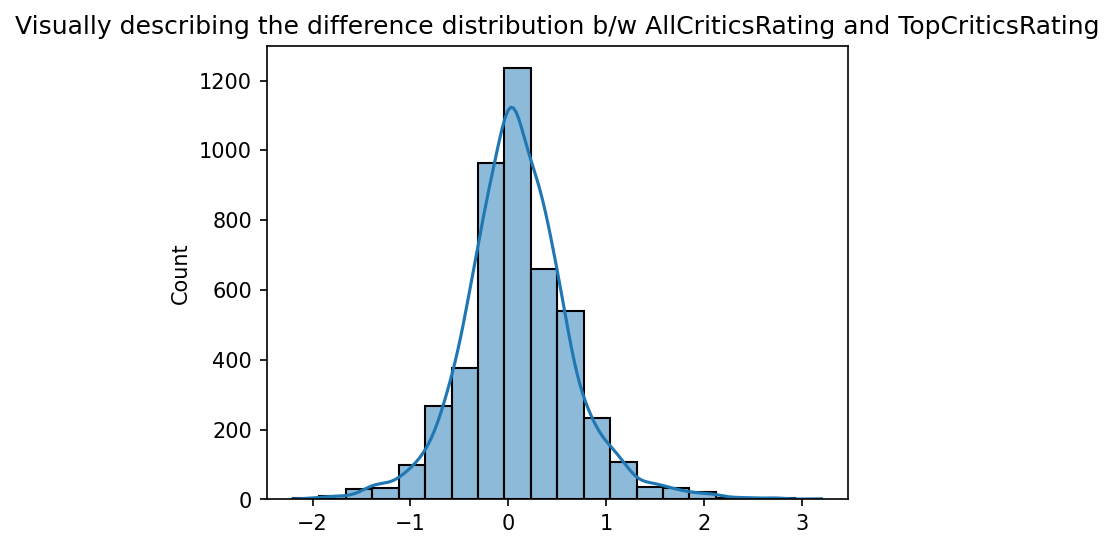

In [24]:
#dist_diff1.hist()# Describing 
fig = plt.figure(figsize=(5, 4), dpi=150)
sns.histplot(dist_diff,bins=20,kde=True)
plt.title('Visually describing the difference distribution b/w AllCriticsRating and TopCriticsRating')

- <b>The chart looks slightly left skewed</b>

## T-Test

In [25]:
sci.stats.ttest_rel(movies['rtAllCriticsRating'],movies['rtTopCriticsRating'],nan_policy='omit')

Ttest_relResult(statistic=11.691646881769833, pvalue=3.813058893006197e-31)

- Do the data indicate a difference between the ratings given to movies by all critics and those given by top critics?

- <b> p-value< 0.05 and hence rejects the null hypothesis that there is no difference between the ratings given by AllCritics and  the ones given by the TopCritics. So, there is difference.</b>

In [26]:
#Masking out the inequality in the IDs to basically remove duplicated IDs
rt_mask=(movie_and_ratings['rtAudienceRating']==movie_and_ratings['rtAudienceRating']) & (movie_and_ratings['mean_rating']== movie_and_ratings['mean_rating'])
rt_mask

movieID
1         True
2         True
3         True
4         True
5         True
         ...  
65088     True
65091     True
65126     True
65130     True
65133    False
Length: 10109, dtype: bool

..

In [27]:
#Applying the masks to the Dataframe
rt_chk_movies=movie_and_ratings[rt_mask]


In [28]:
#Rating here refers to the mean
sci.stats.ttest_rel(rt_chk_movies['mean_rating'],rt_chk_movies['rtAudienceRating'])

Ttest_relResult(statistic=-27.76689581170543, pvalue=2.0388425974633915e-161)

- Do the data indicate a difference between the average audience rating RottenTomatoes users give to a movie and the mean rating MovieLens users give to it?

- <b>P-value < 0.05 hence rejecting the null hypothesis that there is no difference between the average audience rating anf the mean rating. There is difference indeed</b>

- why is the paired t-test the appropriate test here?

-<b> Paired T-test is the most apporiopriate here because they are of the same group being tested under different conditions</b>

## Confidence interval

In [29]:
#loading movie-genre data set
movie_genre=pd.read_table('movie_genres.dat', sep='\t', na_values=['\\N'], encoding='latin1')
movie_genre

,movieID,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
...,...,...
20804,65126,Comedy
20805,65126,Drama
20806,65130,Drama
20807,65130,Romance


In [30]:
#Merging the movie_genre data and the movie_and_ratings data
ci_movie=movie_and_ratings.merge(movie_genre,how='inner',right_on='movieID', left_index=True)
ci_movie

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,...,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,mean_rating,rating_count,movieID,genre
0,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,...,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...,3.735154,1263,1,Adventure
1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,...,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...,3.735154,1263,1,Animation
2,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,...,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...,3.735154,1263,1,Children
3,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,...,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...,3.735154,1263,1,Comedy
4,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9.0,73.0,73.0,0.0,...,0.0,100.0,3.7,102338.0,81.0,http://content7.flixster.com/movie/10/93/63/10...,3.735154,1263,1,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20804,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135.0,73.0,62.0,...,18.0,30.0,3.3,13893.0,55.0,http://content6.flixster.com/movie/10/85/09/10...,3.250000,2,65126,Comedy
20805,Choke,1024715,Choke,http://ia.media-imdb.com/images/M/MV5BMTMxMDI4...,2008,choke,5.6,135.0,73.0,62.0,...,18.0,30.0,3.3,13893.0,55.0,http://content6.flixster.com/movie/10/85/09/10...,3.250000,2,65126,Drama
20806,Revolutionary Road,959337,Revolutionary Road,http://ia.media-imdb.com/images/M/MV5BMTI2MzY2...,2008,revolutionary_road,6.7,194.0,133.0,61.0,...,11.0,69.0,3.5,46044.0,70.0,http://content8.flixster.com/movie/10/88/40/10...,2.500000,1,65130,Drama
20807,Revolutionary Road,959337,Revolutionary Road,http://ia.media-imdb.com/images/M/MV5BMTI2MzY2...,2008,revolutionary_road,6.7,194.0,133.0,61.0,...,11.0,69.0,3.5,46044.0,70.0,http://content8.flixster.com/movie/10/88/40/10...,2.500000,1,65130,Romance


In [31]:
def mean_estimate(vals):
    # vals is a series of measurements of a single variable
    mean = vals.mean()
    se = vals.sem()  # Pandas has an SEM function too.
    
    ci_width = 1.96 * se
    return pd.Series({
        'mean': mean,
        'std': vals.std(),
        'count': vals.count(),
        'se': vals.sem(),
        'ci_width': ci_width,
        'ci_min': mean - ci_width,
        'ci_max': mean + ci_width
    })

In [32]:
#Computing the confidence intervals parametrically.
conf_int_frame=ci_movie.groupby('genre')['rtAllCriticsRating'].apply(mean_estimate).unstack()
conf_int_frame.sort_values('mean',ascending=False).dropna()# soriting by the highest mean

,mean,std,count,se,ci_width,ci_min,ci_max
genre,,,,,,,
Film-Noir,7.265079,1.271932,126.0,0.113313,0.222093,7.042986,7.487172
Documentary,7.137386,0.975539,329.0,0.053783,0.105415,7.031971,7.242801
IMAX,6.950000,0.747440,16.0,0.186860,0.366246,6.583754,7.316246
War,6.753351,1.354775,388.0,0.068778,0.134805,6.618545,6.888156
Western,6.613472,1.394007,193.0,0.100343,0.196672,6.416800,6.810143
Musical,6.486957,1.318684,345.0,0.070996,0.139151,6.347805,6.626108
Drama,6.465219,1.336586,4284.0,0.020421,0.040025,6.425195,6.505244
Animation,6.343404,1.393417,235.0,0.090897,0.178157,6.165247,6.521561
Mystery,6.236259,1.481585,433.0,0.071200,0.139553,6.096706,6.375812


- Does it look like the top two genres have different mean critic ratings? Does it look like the top and bottom genres have different mean critic ratings? Defend your answers using the confidence intervals.

- <b> The top two genres, there is no sufficient evidence to show that they are different. From the confidence interval, they overlap and hence not different.
However, the top and bottom genres are different going by their confidence intervals
</b>

## Bootstrapped Confidence

In [33]:
def boot_mean_estimate(vals, nboot=1000):#Function for bootstrap confidence
    obs = vals.dropna()  # ignore missing values
    mean = obs.mean()
    n = obs.count()
    
    boot_means = [np.mean(rng.choice(obs, size=n)) for i in range(nboot)]
    ci_low, ci_high = np.quantile(boot_means, [0.025, 0.975])
    return pd.Series({
        'mean': mean,
        'count': n,
        'ci_low': ci_low,
        'ci_high': ci_high
    })

In [34]:
#Doing the bootstrapped confidence interval
bootstr_conf=ci_movie.groupby('genre')['rtAllCriticsRating'].apply(boot_mean_estimate).unstack()
bootstr_conf.sort_values('mean',ascending=False)# sorting 

,mean,count,ci_low,ci_high
genre,,,,
Film-Noir,7.265079,126.0,7.041250,7.475437
Documentary,7.137386,329.0,7.036451,7.244073
IMAX,6.950000,16.0,6.618750,7.312656
War,6.753351,388.0,6.616740,6.886089
Western,6.613472,193.0,6.421231,6.809352
Musical,6.486957,345.0,6.348935,6.621551
Drama,6.465219,4284.0,6.428871,6.506864
Animation,6.343404,235.0,6.157000,6.513191
Mystery,6.236259,433.0,6.101611,6.371363


- Does this look the same as the standard error CIs?

- <b>They look the same as the standard error CIs</b>

## Popularity and Bootstraps 

In [35]:
# Grouping by MovieID to show the counts of each movie the various genres
movie_num_rate=rate_movies.groupby('movieID')['rating'].agg(['count'])
movie_num_rate.sort_values(by='count',ascending=False)

,count
movieID,
2571,1670
4993,1576
356,1568
296,1537
5952,1528
...,...
56015,1
7821,1
56030,1


In [36]:
#Selecting movies that are of the Documentary genre
boot_doc=ci_movie.loc[ci_movie['genre']=='Documentary'].sort_values(by='rating_count',ascending=False)
boot_doc

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,...,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,mean_rating,rating_count,movieID,genre
10372,Bowling for Columbine,310793,Bowling for Columbine,http://ia.media-imdb.com/images/M/MV5BNDA0MjUx...,2002,bowling_for_columbine,8.2,160.0,154.0,6.0,...,2.0,93.0,3.5,24080.0,81.0,http://content8.flixster.com/movie/10/93/45/10...,3.755164,823,5669,Documentary
14953,Fahrenheit 9/11,361596,Fahrenheit 9/11,http://ia.media-imdb.com/images/M/MV5BMjAyODU1...,2004,fahrenheit_911,7.3,224.0,187.0,37.0,...,8.0,82.0,3.3,22990.0,69.0,http://content6.flixster.com/movie/26/70/26709...,3.614224,696,8622,Documentary
14723,Super Size Me,390521,Super Size Me,http://ia.media-imdb.com/images/M/MV5BODc1MDg3...,2004,food-and-culture,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,http://images.rottentomatoescdn.com/images/def...,3.711450,655,8464,Documentary
17538,La marche de l'empereur,428803,El viaje del emperador,http://ia.media-imdb.com/images/M/MV5BMTgzNTA5...,2005,march_of_the_penguins,7.8,163.0,153.0,10.0,...,3.0,92.0,3.5,18536.0,76.0,http://content7.flixster.com/movie/24/99/24990...,3.782857,350,34072,Documentary
18413,An Inconvenient Truth,497116,Una verdad incómoda,http://ia.media-imdb.com/images/M/MV5BOTg3NjYx...,2006,inconvenient_truth,7.7,158.0,147.0,11.0,...,2.0,94.0,3.6,41842.0,75.0,http://content8.flixster.com/movie/46/15/46153...,3.767802,323,45950,Documentary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6082,Black Tar Heroin: The Dark End of the Street,221023,Black Tar Heroin: The Dark End of the Street,NaN,2000,black_tar_heroin_the_dark_end_of_the_street,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,http://content6.flixster.com/movie/10/91/78/10...,3.000000,1,3303,Documentary
17862,Emmanuel's Gift,447016,Emmanuel's Gift,http://ia.media-imdb.com/images/M/MV5BMjA1ODIw...,2005,emmanuels_gift,6.4,22.0,18.0,4.0,...,2.0,75.0,3.6,352.0,76.0,http://content8.flixster.com/movie/25/03/25039...,3.000000,1,39425,Documentary
5973,Falkens öga,183065,Falkens öga,http://ia.media-imdb.com/images/M/MV5BMTg2NjA1...,1998,kestrels_eye,6.6,7.0,5.0,2.0,...,0.0,100.0,3.2,281.0,38.0,http://content7.flixster.com/movie/31/01/31019...,4.000000,1,3237,Documentary
5919,Heavenly Creatures,110005,Criaturas celestiales,http://ia.media-imdb.com/images/M/MV5BMTkwNjk1...,1994,heavenly_creatures,8.3,41.0,39.0,2.0,...,0.0,100.0,3.7,8208.0,82.0,http://content9.flixster.com/movie/10/90/75/10...,1.000000,1,3193,Documentary


In [37]:
#Selecting the movies that are of the Action genre
boot_doc1=ci_movie.loc[ci_movie['genre']=='Action'].sort_values(by='rating_count',ascending=False)
boot_doc1

,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,...,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL,mean_rating,rating_count,movieID,genre
4789,The Matrix,133093,Matrix,http://ia.media-imdb.com/images/M/MV5BMjEzNjg1...,1999,matrix,7.4,125.0,108.0,17.0,...,9.0,67.0,3.6,207333.0,81.0,http://content7.flixster.com/movie/16/90/52/16...,4.173952,1670,2571,Action
9143,The Lord of the Rings: The Fellowship of the Ring,120737,El señor de los anillos: La comunidad del anillo,http://ia.media-imdb.com/images/M/MV5BMTk3Nzcw...,2001,lord_of_the_rings_the_fellowship_of_the_ring,8.1,202.0,186.0,16.0,...,3.0,92.0,4.1,282006.0,92.0,http://content9.flixster.com/movie/26/65/26650...,4.082487,1576,4993,Action
10880,The Lord of the Rings: The Two Towers,167261,El señor de los anillos: Las dos torres,http://ia.media-imdb.com/images/M/MV5BMTAyNDU0...,2002,lord_of_the_rings_the_two_towers,8.4,218.0,210.0,8.0,...,0.0,100.0,4.1,263598.0,92.0,http://content6.flixster.com/movie/25/61/25611...,4.030105,1528,5952,Action
13228,The Lord of the Rings: The Return of the King,167260,El señor de los anillos: El retorno del rey,http://ia.media-imdb.com/images/M/MV5BMjE4MjA1...,2003,lord_of_the_rings_the_return_of_the_king,8.6,239.0,225.0,14.0,...,1.0,97.0,3.7,288649.0,83.0,http://content7.flixster.com/movie/10/84/07/10...,4.094029,1457,7153,Action
936,Jurassic Park,107290,Jurassic Park: Parque jurásico,http://ia.media-imdb.com/images/M/MV5BMTc2NDIx...,1993,jurassic_park,7.2,38.0,33.0,5.0,...,1.0,90.0,3.6,91260.0,81.0,http://content9.flixster.com/movie/25/84/25842...,3.430594,1448,480,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,The Strangers,482606,Los extraños,http://ia.media-imdb.com/images/M/MV5BMTkxODAy...,2008,the_strangers,5.0,146.0,65.0,81.0,...,13.0,50.0,3.1,55773.0,48.0,http://content9.flixster.com/movie/11/12/79/11...,4.000000,1,1434,Action
17611,Secuestro express,371939,Secuestro express,http://ia.media-imdb.com/images/M/MV5BMTg0MDc3...,2005,secuestro_express,5.7,42.0,22.0,20.0,...,5.0,61.0,3.2,1109.0,73.0,http://content7.flixster.com/movie/24/99/24991...,3.000000,1,34526,Action
14331,Dangan ranna,116015,Dangan ranna,http://ia.media-imdb.com/images/M/MV5BMTMxMjU5...,1996,dangan-ranna-dangan-runner-nonstop,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,http://content9.flixster.com/movie/11/13/44/11...,2.500000,1,8037,Action
14377,Beyond the City Limits,201479,Beyond the City Limits,http://ia.media-imdb.com/images/M/MV5BMTYxMDk4...,2001,rip-it-off,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,http://content8.flixster.com/movie/10/84/93/10...,3.500000,1,8122,Action


..

In [38]:
def boot_ind(s1, s2, nboot=10000):
    ## we will ignore NAs here
    obs1 = s1.dropna()
    obs2 = s2.dropna()
    n1 = len(obs1)
    n2 = len(obs2)
    
    ## pool the observations together
    pool = pd.concat([obs1, obs2])
    ## grab the observed mean
    md = np.median(s1) - np.median(s2)
    
    ## compute our bootstrap samples of the mean under H0
    b1 = np.array([np.median(rng.choice(pool, size=n1)) for i in range(nboot)])
    b2 = np.array([np.median(rng.choice(pool, size=n2)) for i in range(nboot)])
    
    ## the P-value is the probability that we observe a difference as large
    ## as we did in the raw data, if the null hypothesis were true
    return md, np.mean(np.abs(b1 - b2) >= np.abs(md))

In [39]:
boot_ind(boot_doc1['rating_count'],  boot_doc['rating_count'])

(44.5, 0.0)

- <b>P-value < 0.05.And we reject the null hypothesis that action movies and documentaries have the same median number of ratings </b>

### Median number of ratings

In [40]:
np.median(boot_doc1['rating_count']), np.median(boot_doc['rating_count'])

(56.0, 11.5)

### Using # of Audience ratings

In [41]:
boot_ind(boot_doc1['rtAudienceNumRatings'].dropna(),  boot_doc['rtAudienceNumRatings'].dropna())

(4860.5, 0.0)

- <b>P-value< 0.05 and so rejects the null hypothesis that Audience rating of Action movies and that of Documentaries have the same median</b>

In [42]:
def boot_int(s1, s2, nboot=10000):
    ## we will ignore NAs here
    obs1 = s1.dropna()
    obs2 = s2.dropna()
    n1 = len(obs1)
    n2 = len(obs2)
    
    ## pool the observations together
    pool = pd.concat([obs1, obs2])
    ## grab the observed mean
    md = np.mean(s1) - np.mean(s2)
    
    ## compute our bootstrap samples of the mean under H0
    b1 = np.array([np.mean(rng.choice(pool, size=n1)) for i in range(nboot)])
    b2 = np.array([np.mean(rng.choice(pool, size=n2)) for i in range(nboot)])
    
    ## the P-value is the probability that we observe a difference as large
    ## as we did in the raw data, if the null hypothesis were true
    return md, np.mean(np.abs(b1 - b2) >= np.abs(md))

In [43]:
boot_int(boot_doc1['rtAllCriticsRating'].dropna(),  boot_doc['rtAllCriticsRating'].dropna())

(-1.5622390828886301, 0.0)

In [44]:
sci.stats.ttest_ind(boot_doc1['rtAllCriticsRating'].dropna(),  boot_doc['rtAllCriticsRating'].dropna(), nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=-22.22989948309443, pvalue=1.811167714689777e-86)

- Compare the mean of the critic ratings (using the All Critics ratings from Rotten Tomatoes) between action and documentary movies. Is there a difference? 

- <b> In both the bootstrap test and the 2-sample T-test, the result reject the null hypothesis; meaning there is a difference, the p-values are less than 0.05</b>

- <b> I used the 2-sample T-test in this case because they are from two different groups subjected to a particular condition</b>

## Write 2 paragraphs about what you have learned through this assignment.

- First off,i learned how to use more than one data files in one analysis. Also, parametric computations, in this data analysis do not produce  different results from the bootstrapped process. Also,in bootstrapping, mean has always been the statistic used but here median was used
- Second, i learnt that i need to be more careful when making comparisons between two groups of data.Because more evidences are required before one could say that there is a difference between two groups of data. That is the reason i think we were asked to use both T-test and bootstrap to compare between various groups of data.